<a href="https://colab.research.google.com/github/bhuvnesh0001/Sales_analysis-/blob/main/Sales_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Data/train.csv'
df = pd.read_csv(file_path)
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (9800, 18)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
# Check column names
print("\nColumns:", df.columns.tolist())

# Data types
print("\nData types:\n", df.dtypes)

# Null values
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", df.describe())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())



Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']

Data types:
 Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

Missing values:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product 

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# ✅ Step 2: Drop rows with missing Postal Code
df = df.dropna(subset=['Postal Code'])

# ✅ Step 3: Convert Postal Code to string
df['Postal Code'] = df['Postal Code'].astype(int).astype(str)

# ✅ Step 4: Confirm everything looks good
print("Data types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSample data:\n", df.head())


Data types:
 Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

Sample data:
    Row ID

<ipython-input-4-134fa3c9049b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal Code'] = df['Postal Code'].astype(int).astype(str)


EDA Question 1: 📈 What are the monthly sales trends?


<ipython-input-5-e60c088a4ac2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].dt.to_period('M')


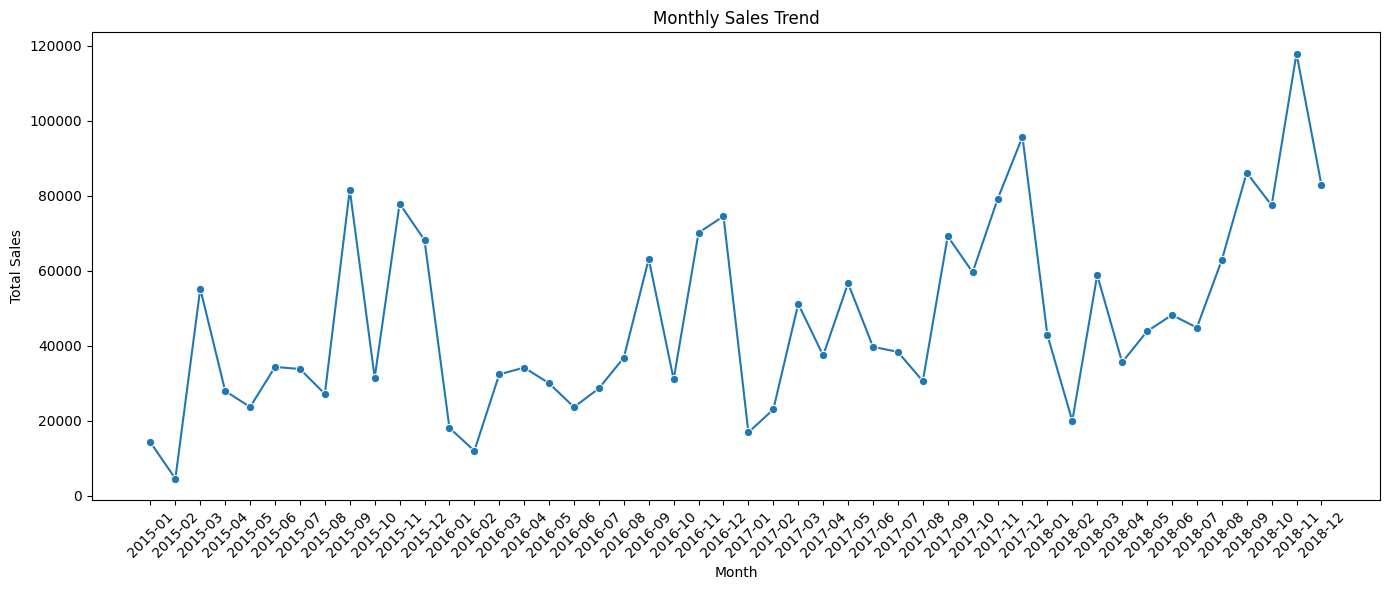

In [ ]:
# Extract month and year
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


✅ EDA Question 2: 🛍️ Which products and categories generate the most sales?

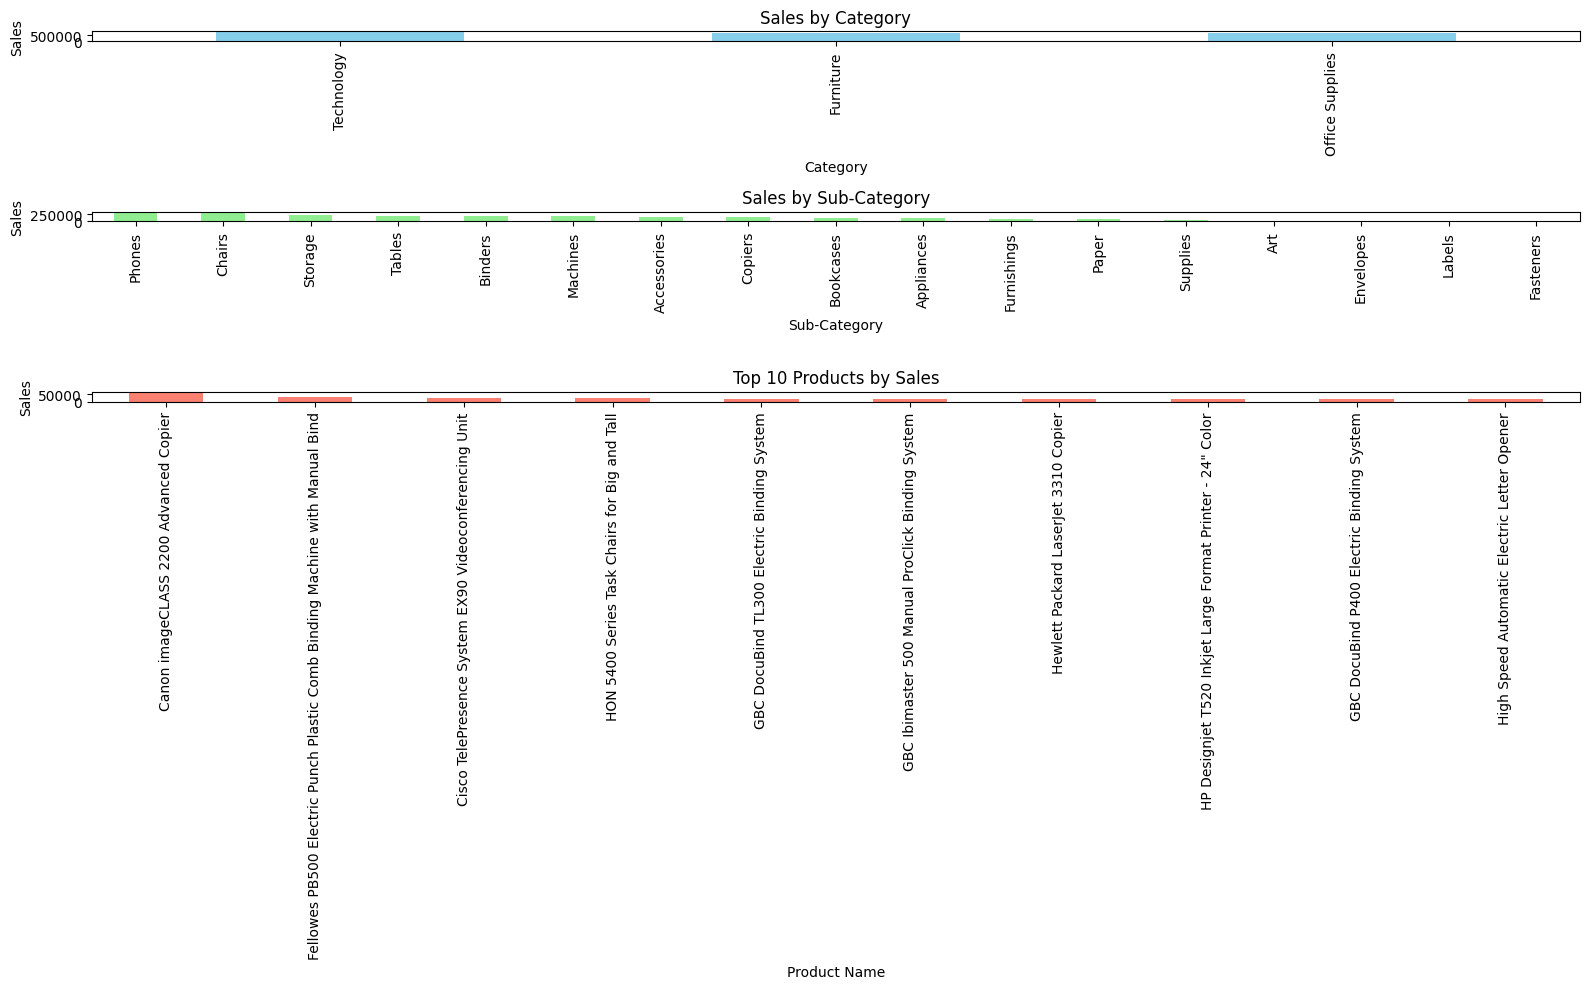

In [ ]:
# Category-wise sales
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Sub-category-wise sales
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

# Product-wise sales (top 10)
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(16,10))

plt.subplot(3, 1, 1)
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Category')
plt.ylabel('Sales')

plt.subplot(3, 1, 2)
sub_category_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales by Sub-Category')
plt.ylabel('Sales')

plt.subplot(3, 1, 3)
top_products.plot(kind='bar', color='salmon')
plt.title('Top 10 Products by Sales')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()


✅ EDA Question 3: 🌍 Which states/regions bring in the most revenue?

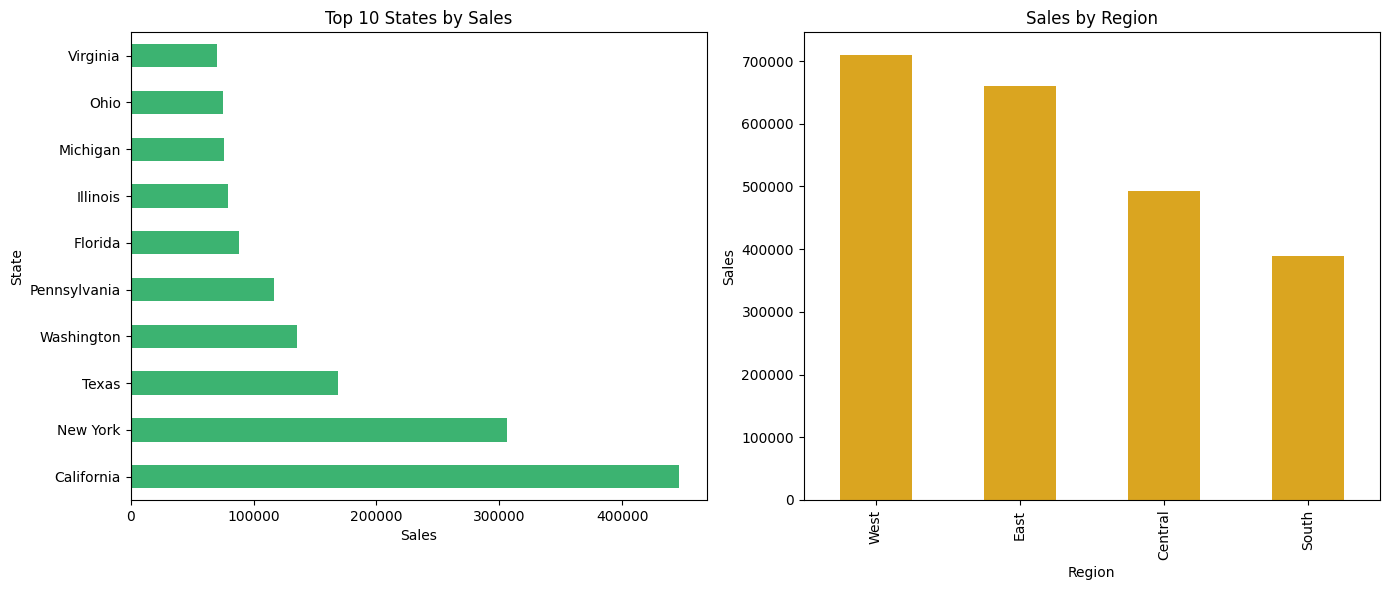

In [ ]:
# Sales by State
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
state_sales.plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 States by Sales')
plt.xlabel('Sales')

plt.subplot(1, 2, 2)
region_sales.plot(kind='bar', color='goldenrod')
plt.title('Sales by Region')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()


✅ EDA Question 4: 🚚 How long does shipping usually take?

Average shipping time: 3.961180917356216
Shipping time distribution:
 Shipping Time (Days)
0     514
1     363
2    1294
3     978
4    2709
5    2146
6    1170
7     615
Name: count, dtype: int64


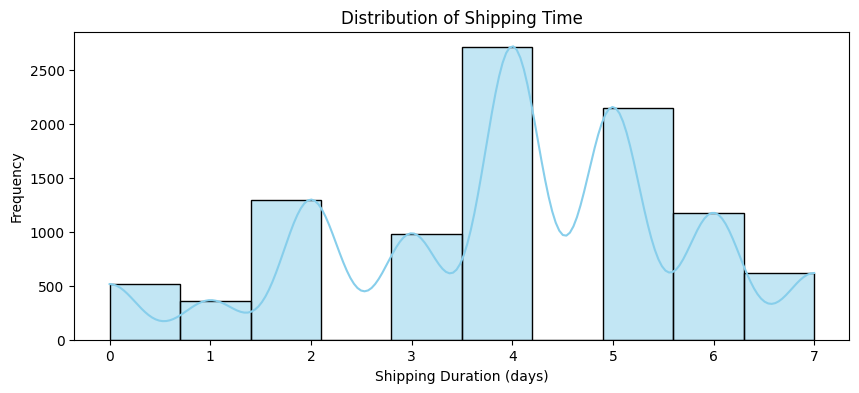

In [ ]:
# Calculate shipping duration
df['Shipping Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

# Basic stats
print("Average shipping time:", df['Shipping Time (Days)'].mean())
print("Shipping time distribution:\n", df['Shipping Time (Days)'].value_counts().sort_index())

# Plot
plt.figure(figsize=(10,4))
sns.histplot(df['Shipping Time (Days)'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Shipping Time')
plt.xlabel('Shipping Duration (days)')
plt.ylabel('Frequency')
plt.show()


✅ EDA Question 5: 📊 How are sales distributed? Are there outliers?


count     9789.000000
mean       230.116193
std        625.302079
min          0.444000
25%         17.248000
50%         54.384000
75%        210.392000
max      22638.480000
Name: Sales, dtype: float64


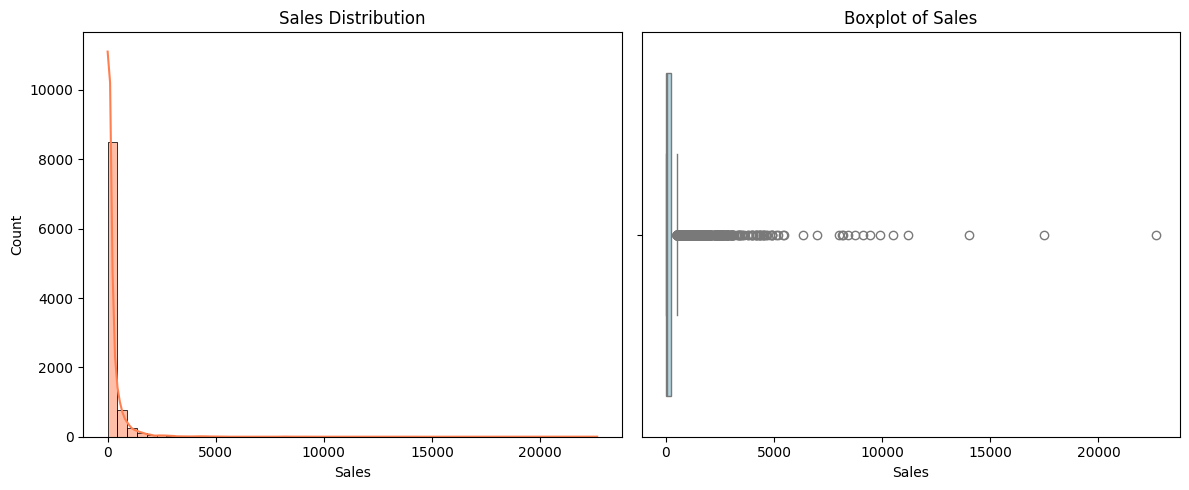

In [ ]:
# Summary stats
print(df['Sales'].describe())

# Plot
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], bins=50, kde=True, color='coral')
plt.title('Sales Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Sales'], color='lightblue')
plt.title('Boxplot of Sales')

plt.tight_layout()
plt.show()


1. Do higher shipping times affect sales volume?

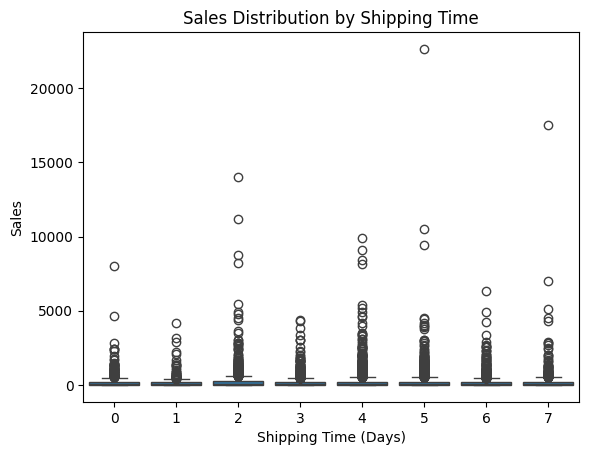

In [ ]:
sns.boxplot(x='Shipping Time (Days)', y='Sales', data=df)
plt.title('Sales Distribution by Shipping Time')
plt.show()


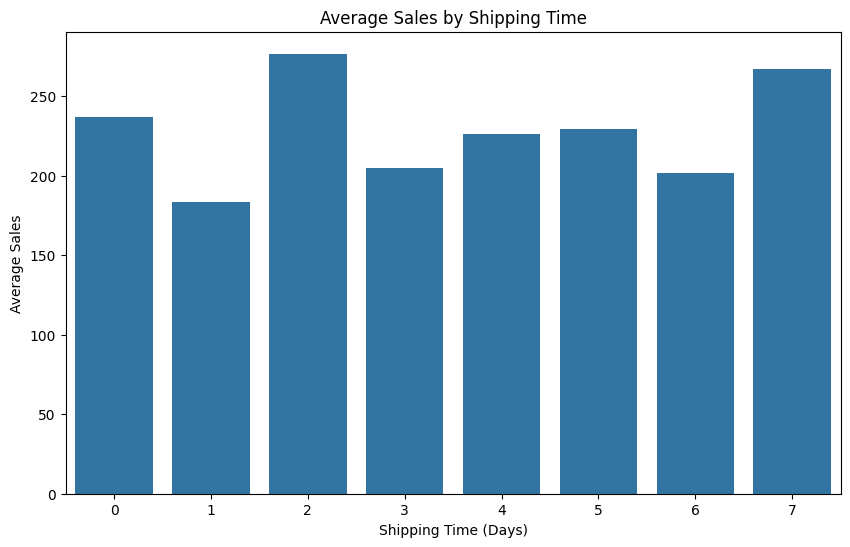

In [ ]:
avg_sales_by_time = df.groupby('Shipping Time (Days)')['Sales'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Shipping Time (Days)', y='Sales', data=avg_sales_by_time)
plt.title('Average Sales by Shipping Time')
plt.ylabel('Average Sales')
plt.show()


In [ ]:
region_shipping = df.groupby('Region').agg({
    'Shipping Time (Days)': 'mean',
    'Sales': 'sum'
}).sort_values('Sales', ascending=False)

print(region_shipping)


         Shipping Time (Days)        Sales
Region                                    
West                 3.930255  710219.6845
East                 3.910238  660589.3560
Central              4.065876  492646.9132
South                3.961202  389151.4590


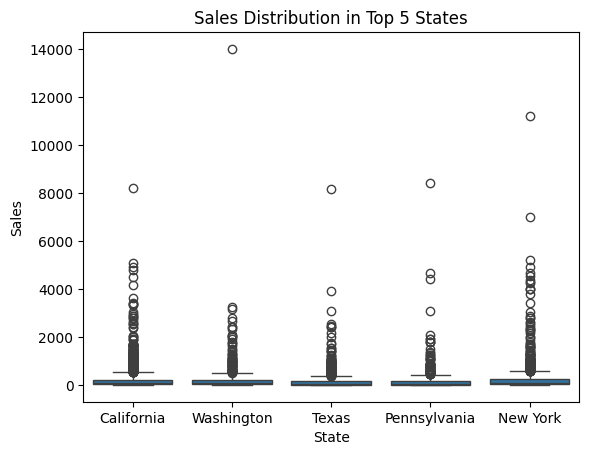

In [ ]:
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(5).index
top_state_products = df[df['State'].isin(top_states)]

sns.boxplot(x='State', y='Sales', data=top_state_products)
plt.title('Sales Distribution in Top 5 States')
plt.show()


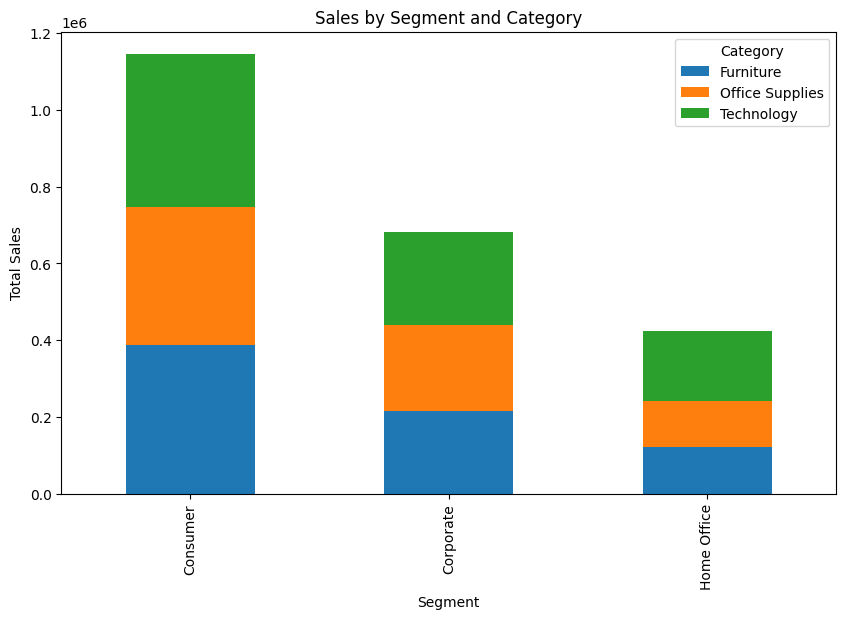

In [ ]:
segment_category_sales = df.groupby(['Segment', 'Category'])['Sales'].sum().unstack()
segment_category_sales.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sales by Segment and Category')
plt.ylabel('Total Sales')
plt.show()


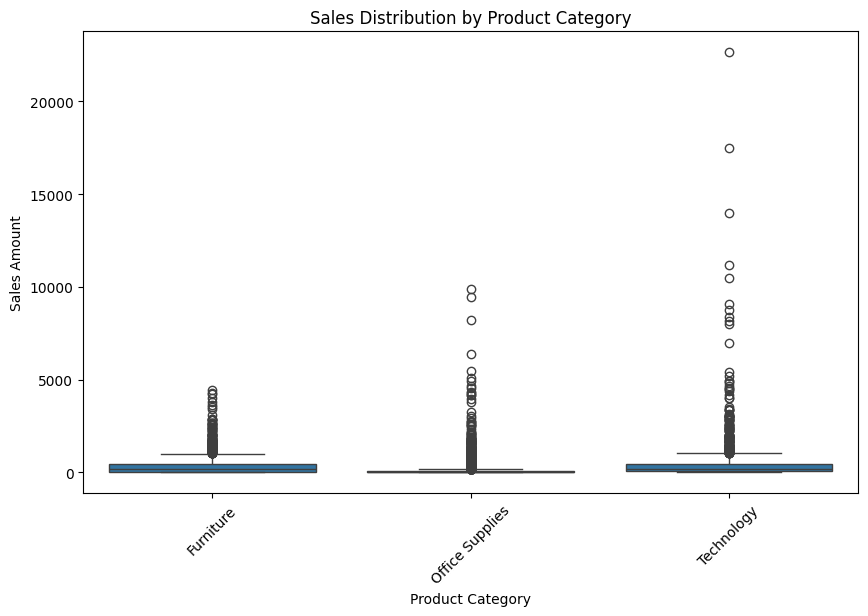

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Category', y='Sales')
plt.title('Sales Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()


### 📊 Insight: High-Value Sales by Product Category

From the box plot visualization of sales across product categories:

- **Technology** exhibits the **most high-value outlier sales**, with several transactions exceeding $20,000. These likely correspond to premium items such as computers, servers, or electronics.
- **Furniture** also contains multiple outliers, though the maximum sale amounts are lower than Technology.
- **Office Supplies** shows a tight distribution with the fewest and smallest outliers, indicating this category consists of lower-cost, frequently ordered items.

#### 💡 Business Implication:
Technology contributes significantly to high-revenue transactions and may benefit from targeted premium support or upselling strategies. Office Supplies, while lower in transaction value, likely drives volume-based sales and repeat purchases.
